In [1]:
# #!/usr/bin/env python3

import matplotlib.pyplot as plt
import pandas as pd 
import re
import warnings
warnings.filterwarnings("ignore")

In [2]:
## Reading in Data ##
df = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")

In [3]:
def get_testing_info(country_name):
    country_info = df.loc[df['location'] == country_name]
    cleaned_data = country_info[["date", "tests_per_case"]].copy()
    cleaned_data = cleaned_data.dropna()

    dates = cleaned_data["date"].tolist()
    tests_per_case = cleaned_data["tests_per_case"].tolist()

    return dates, tests_per_case

In [4]:
def tests_per_case_plot(x, y, country_name):

    months = []

    for date in x:
        month = re.findall(r"(2020-[0-9]{0,2}-01)", date)
        if month:
            months.append(month[0])


    plt.figure(figsize = (15, 8))
    plt.plot(x, y)
    plt.title("{} Tests per Case".format(country_name), size = 25)
    plt.xlabel("Date", size = 20)
    plt.ylabel("Tests per Case", size = 20)
    plt.yticks(size = 10)
    plt.xticks(months, size = 10)
    plt.show()

In [5]:
def tests_per_case_visualization(country_name):
    dates = get_testing_info(country_name)[0]
    tests_per_case = get_testing_info(country_name)[1]

    tests_per_case_plot(dates, tests_per_case, country_name)

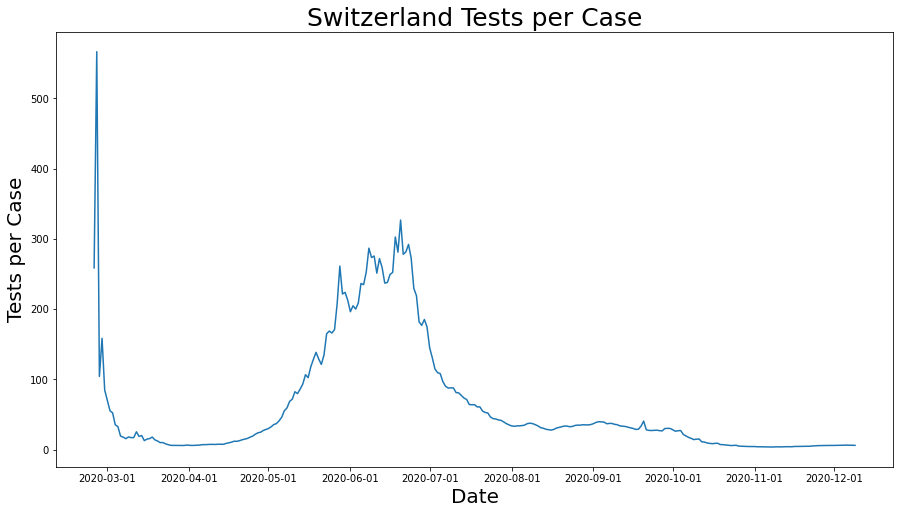

In [6]:
tests_per_case_visualization("Switzerland")